In [1]:
import tensorflow as tf
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from BaselineModel import Baseline_mb
from functions.get_min_max_dict import get_min_max_dict
from functions.data_gather import data_gather
from visualization.compare_plot import plot_results
max_count=100


In [2]:
ds_path = 'data/test_cv'

In [3]:
# @title Load Test Dataset

def normalize(x, labels):
    drop = tf.experimental.numpy.cbrt(labels[2])
    return x, (labels[0],labels[1],drop)

def combined_dataset(loaded_datasets):
  combined_dataset = loaded_datasets[0]
  for dataset in loaded_datasets[1:]:
      combined_dataset = combined_dataset.concatenate(dataset)
  return combined_dataset

ds_test_temp = []
for i in range(0,5):
  ds_test_temp.append(tf.data.Dataset.load(f"{ds_path}/{i}/validation", compression="GZIP"))
  ds_test_temp.append(tf.data.Dataset.load(f"{ds_path}/{i}/training", compression="GZIP"))

ds_test_baseline = combined_dataset(ds_test_temp)


In [4]:
baseline_model = Baseline_mb()

baseline_model.set_min_max_scores(
    get_min_max_dict(
        tf.data.Dataset.load(f"{ds_path}/0/training", compression="GZIP"),
        baseline_model.min_max_scores_fields,
    )
)

baseline_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanAbsolutePercentageError(),
)
baseline_model.load_weights(tf.train.latest_checkpoint('ckpt/Baseline_mb/'))

ds_test_temp = []
for i in range(0,5):
  ds_test_temp.append(tf.data.Dataset.load(f"{ds_path}/{i}/training", compression="GZIP"))
  ds_test_temp.append(tf.data.Dataset.load(f"{ds_path}/{i}/validation", compression="GZIP"))

ds_test_baseline = combined_dataset(ds_test_temp)

base_original,base_predicted,_ = data_gather(ds_test_baseline,baseline_model,max_count=max_count)

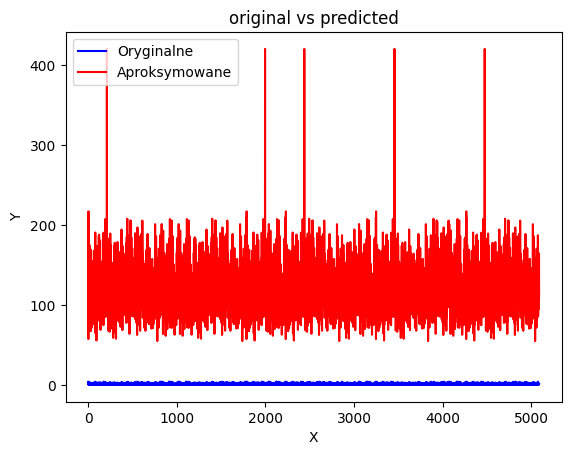

In [6]:
plot_results(base_original[0],base_predicted[0],title='original vs predicted')